In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [3]:
data_dir='tea sickness dataset'

In [4]:
# Set up data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

# Load in the dataset
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 711 images belonging to 8 classes.


Found 174 images belonging to 8 classes.


In [5]:
batch_size=32

In [6]:
# Step 1: Choose a pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, 
                   input_shape=(224, 224, 3))

# Step 2: Load the pre-trained model
model = Sequential()
model.add(base_model)

# Step 3: Freeze initial layers
for layer in base_model.layers:
    layer.trainable = False

# Step 4: Add new classification layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))  

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 21139528 (80.64 MB)
Trainable params: 6424840 (24.51 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [7]:
# Step 5: Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
history = model.fit(
    train_data,
    epochs=50,
    batch_size=batch_size,
    validation_data=val_data
)

Epoch 1/50
23/23 [==============================] - 166s 7s/step - loss: 3.7810 - accuracy: 0.2532 - val_loss: 1.7640 - val_accuracy: 0.3161
Epoch 2/50
23/23 [==============================] - 179s 8s/step - loss: 1.3171 - accuracy: 0.4937 - val_loss: 1.3142 - val_accuracy: 0.5230
Epoch 3/50
23/23 [==============================] - 178s 8s/step - loss: 1.1128 - accuracy: 0.5935 - val_loss: 1.4018 - val_accuracy: 0.4023
Epoch 4/50
23/23 [==============================] - 191s 8s/step - loss: 0.9626 - accuracy: 0.6582 - val_loss: 1.1718 - val_accuracy: 0.5517
Epoch 5/50
23/23 [==============================] - 171s 7s/step - loss: 0.8370 - accuracy: 0.6948 - val_loss: 1.1713 - val_accuracy: 0.5632
Epoch 6/50
23/23 [==============================] - 177s 8s/step - loss: 0.7273 - accuracy: 0.7159 - val_loss: 1.0269 - val_accuracy: 0.6207
Epoch 7/50
23/23 [==============================] - 201s 9s/step - loss: 0.7019 - accuracy: 0.7370 - val_loss: 0.9921 - val_accuracy: 0.6264
Epoch 8/50
23

In [9]:
import matplotlib.pyplot as plt

def plot_loss(history):
    # Plot training and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper right')
    plt.show()

def plot_accuracy(history):
    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='lower right')
    plt.show()



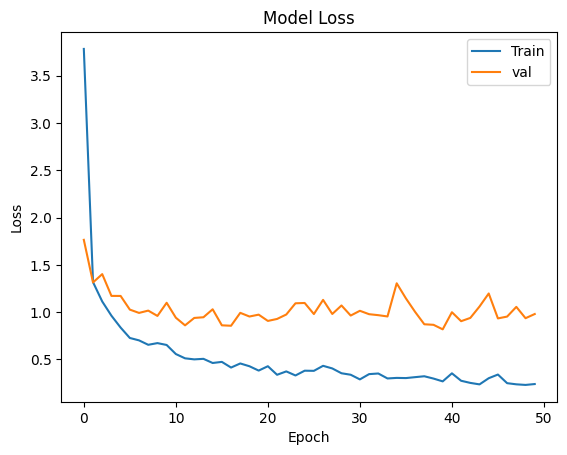

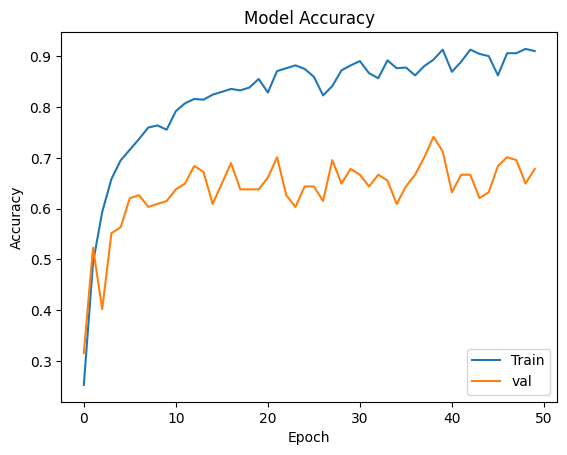

In [10]:
plot_loss(history)
plot_accuracy(history)

In [11]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.6)

test_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size= 32,
    shuffle=True,
    class_mode='categorical',
    subset='validation')

Found 528 images belonging to 8 classes.


In [12]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data)

# Print the results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

17/17 [==============================] - 77s 4s/step - loss: 0.5086 - accuracy: 0.8182
Test Loss: 0.5086135268211365
Test Accuracy: 0.8181818127632141


In [13]:
# Get the true labels for the test data
true_labels = test_data.classes

# Get the predicted labels for the test data
predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)



17/17 [==============================] - 81s 5s/step


In [15]:
# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 4  7  9  8  9  2  5 16]
 [ 2  5 16  5 10  4 12 13]
 [ 7  6 10  5  2  6  8 16]
 [ 4  6  7  9  9  4 15 13]
 [ 4  7  5  7  6  6 13 12]
 [ 4  4  7  5  9  2  5  8]
 [ 3  8 11  9 12  9 14 19]
 [ 8  8 13 11  8  9 12 16]]


1/1 [==============================] - 5s 5s/step


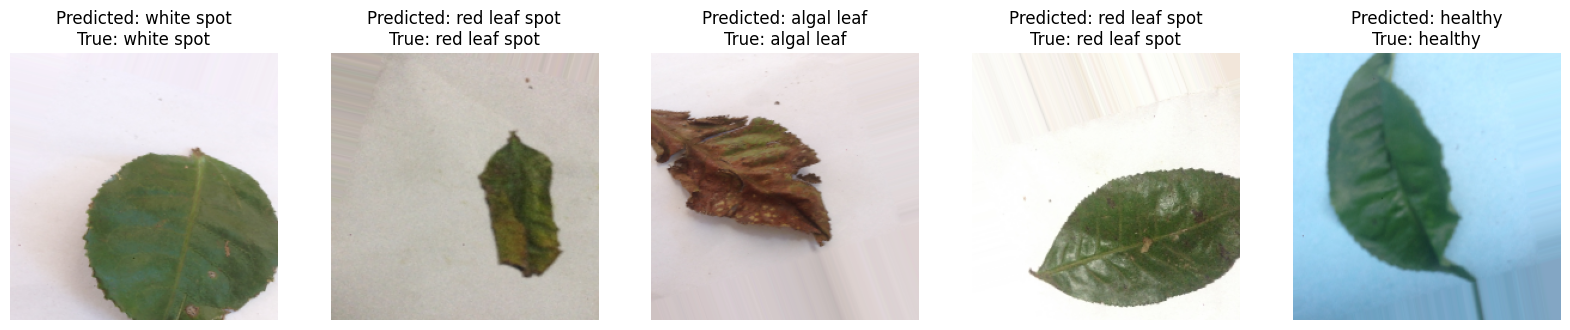

In [16]:
import matplotlib.pyplot as plt

# Get a few images from the test set
num_images = 5
test_images, test_labels = next(test_data)

# Make predictions on the test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels to class names
class_names = list(test_data.class_indices.keys())
true_labels = np.argmax(test_labels, axis=1)
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels]

# Plot the images with their predicted and true labels
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_names[i]}")

plt.show()


In [ ]:
# Save the model
model.save("tea_sickness_model.h5")

# Optionally, you can also save the architecture and weights separately
# Save the architecture as JSON
# model_json = model.to_json()
# with open("tea_sickness_model.json", "w") as json_file:
#     json_file.write(model_json)

# # Save the weights
# model.save_weights("tea_sickness_model_weights.h5")

# print("Model saved successfully.")


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
loaded_model = tf.keras.models.load_model('application/tea_sickness_model.h5')

# Load and preprocess a test image
img_path = 'tea sickness dataset/bird eye spot/IMG_20220503_154020.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Rescale pixel values to [0, 1]

# Make predictions
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions)

# Get class labels from the dataset
class_names = {0: 'Anthracnose', 1: 'algal leaf', 2: 'bird eye spot', 3: 'brown blight', 4: 'gray light', 5: 'healthy', 6: 'red leaf spot', 7: 'white spot'}

# Print the predicted class
print("Predicted class:", class_names[predicted_class])

1/1 [==============================] - 0s 382ms/step
Predicted class: bird eye spot
